## Assignment 3: Drought Working Group Experiments

This notebook makes a 10-panel plot for Assignment 3 with the drought working group experiments.  In this example, I make the plot for all students, but there are some duplicates, so its only necessary to make an 8-panel plot.

* Reads in all the DWG experiments
* Calculates the mean over all years for T and P for each experiment.
* Selects data only for the US
* Takes the difference between the annual mean of each experiment and the climatology experiments
* Makes an 8-panel plot of precip difference and an 8-panel plot of temperature difference

#### Import Statements

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

#### Set files and paths

In [2]:
path='/glade/scratch/'

# Location and name of climatology case
climodir='sknapp'
climocase='dwgcon'
climoexp='PnAn'

userdirs=['dnedza','mkorendy',
          'fhaychap','syoung','zchester',
          'jjoshi','bgay','hhsu','rgaal',
          'nlydeen']

usercases=['dwg_pwaw','dwg','dwg',
           'dwg_PcAn2','dwg1','dwg','testatmF2',
           'dwg_PnAw_new','dwg_pwac','dwg-pnac']

expnames=['PwAw','PwAn','PcAw',
          'PcAn','PcAn','PcAc','PcAc',
          'PnAw','PwAn','PnAc']

### Read in the Climatology Experiment

climo_fnames=path+climodir+'/archive/'+climocase+'/atm/hist/'+climocase+'.cam.h0.*.nc'
ds_climo=xr.open_mfdataset(climo_fnames,combine='nested',concat_dim='time',parallel=True).mean(dim='time')
ds_climo

climo_TEMP=ds_climo['TREFHT']
climo_PRECIP=ds_climo['PRECC']+ds_climo['PRECL']

In [3]:
climo_p_file=path+climodir+'/processed/'+climocase+'/'+climocase+'.cam.h0.PRECT.*.nc'
ds_climo_p=xr.open_mfdataset(climo_p_file,combine='nested',
                             concat_dim='time').mean(dim='time')
climo_t_file=path+climodir+'/processed/'+climocase+'/'+climocase+'.cam.h0.TREFHT.*.nc'
ds_climo_t=xr.open_mfdataset(climo_t_file,combine='nested',
                             concat_dim='time').mean(dim='time')
ds_climo_t

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    date     float64 dask.array<chunksize=(), meta=np.ndarray>
    datesec  float64 dask.array<chunksize=(), meta=np.ndarray>
    TREFHT   (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>

In [4]:
diff_TEMP_list=[]
diff_PRECIP_list=[]

for i,(userdir,usercase,expname) in enumerate(zip(userdirs,usercases,expnames)):

    fname_p=path+userdir+'/processed/'+usercase+'/'+usercase+'.cam.h0.PRECT.*.nc'
    fname_t=path+userdir+'/processed/'+usercase+'/'+usercase+'.cam.h0.TREFHT.*.nc'

    ds_p=xr.open_mfdataset(fname_p,combine='nested',concat_dim='time',parallel=True)
    ds_pmean=ds_p.mean(dim='time').sel(lat=slice(20,60),lon=slice(210,300))

    ds_t=xr.open_mfdataset(fname_t,combine='nested',concat_dim='time',parallel=True)
    ds_tmean=ds_t.mean(dim='time').sel(lat=slice(20,60),lon=slice(210,300))
    
    diff_TEMP=ds_tmean['TREFHT']-ds_climo_t['TREFHT']
    diff_PRECIP=ds_pmean['PRECT']-ds_climo_p['PRECT']
    
    diff_TEMP_list.append(diff_TEMP)
    diff_PRECIP_list.append(diff_PRECIP)

In [5]:
print(len(diff_TEMP_list))

10


### Plot the Multi-panel plot for Temperature

Note I plotted all experiments from all students, so there are some duplicate experiments. Your plot only needs to show 
1 difference for each experiment

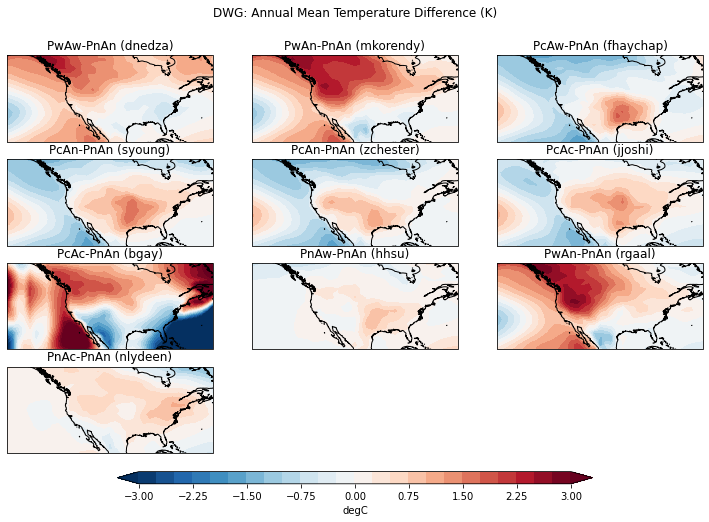

In [6]:
clevs=np.arange(-3,3.25,0.25)
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
axs=axs.flatten()

for i,exp in enumerate(diff_TEMP_list):
    cs=axs[i].contourf(ds_tmean['lon'],ds_tmean['lat'],
                       exp,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='RdBu_r',extend='both')
    axs[i].coastlines()
    axs[i].set_title(expnames[i]+'-PnAn ('+userdirs[i]+')')

fig.delaxes(axs[10])
fig.delaxes(axs[11])

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='degC')

# Add a big title at the top
plt.suptitle('DWG: Annual Mean Temperature Difference (K)')

plt.savefig('DWG_TEMP.png')

### Plot the Multi-panel plot for Precipitation

Note I plotted all experiments from all students, so there are some duplicate experiments. You plot only needs to show 
1 difference for each experiment

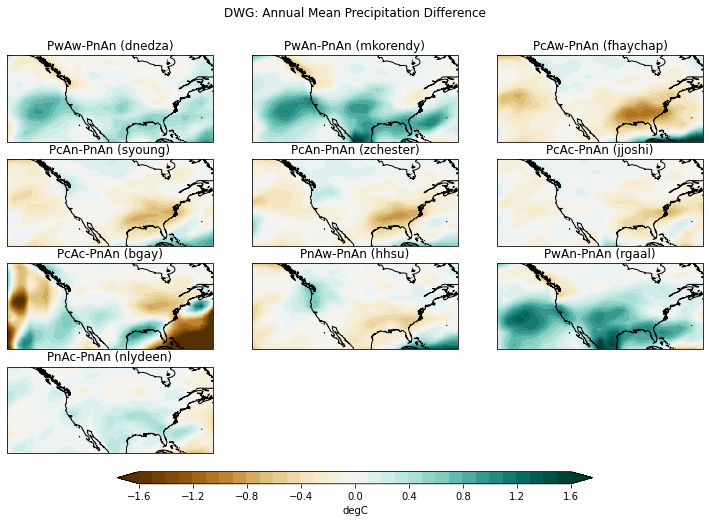

In [7]:
clevs=np.arange(-1.6,1.7,0.1)
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
axs=axs.flatten()

# Units conversion from m/s to mm/day
sf=86400*1000

for i,exp in enumerate(diff_PRECIP_list):
    cs=axs[i].contourf(ds_pmean['lon'],ds_pmean['lat'],
                       exp*sf,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='BrBG',extend='both')
    axs[i].coastlines()
    axs[i].set_title(expnames[i]+'-PnAn ('+userdirs[i]+')')

fig.delaxes(axs[10])
fig.delaxes(axs[11])
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='degC')

# Add a big title at the top
plt.suptitle('DWG: Annual Mean Precipitation Difference')

plt.savefig('DWG_PRECIP.png')